<a href="https://colab.research.google.com/github/rishav-pred/Face-Recognition-System-Machine-Learning/blob/main/Tutorial_4_Lab%20Data%20Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE5DMI Tutorial 4 Data Pre-processing

## Introduction
After learning Python and some of its modules, it is now time to proceed to actual data mining
tasks. However, real world data are often not directly usable by the data mining tools. One of the
main reasons is that the data usually consist of missing values (especially those survey data) or
even noises (outliers). Since they are likely to affect the final outcomes, it is necessary to rectify
these abnormalities before the actual data mining can be performed. Another reason is the need to
transform data into a form that produces meaningful results. For example, when the product prices
involve different currencies for different tuples, they should be unified on a single currency basis.
Data pre-processing refers to converting and/or manipulation data into a form suitable for
subsequent data analysis. In this tutorial, we are going to perform data pre-processing using Python
programming.

## Objectives
Implementing some basic techniques such data cleaning, data transformation, and data reduction

# Sample dataset
* The sample dataset used in this tutorial is extracted from a US Census database. It collected
some statistics such as occupation, education level, and family status, etc.
* The dataset has been used to predict whether one can earn more than 50K a year. Only 500
tuples (in the context of databases, a tuple is one record/ row) appear in the sample dataset
US_census.csv to simplify the tasks.
* This sample dataset is presented in CSV format. Fig. 1 shows this dataset opened in Excel.
The first row is the header showing the attribute (also called feature) names.
* The attributes in the dataset are: age, workclass, final sample weight, education, years of
education, marital status, occupation, relationship, race, gender, capital gain, capital loss,
working hours per week, native country, predicted income.

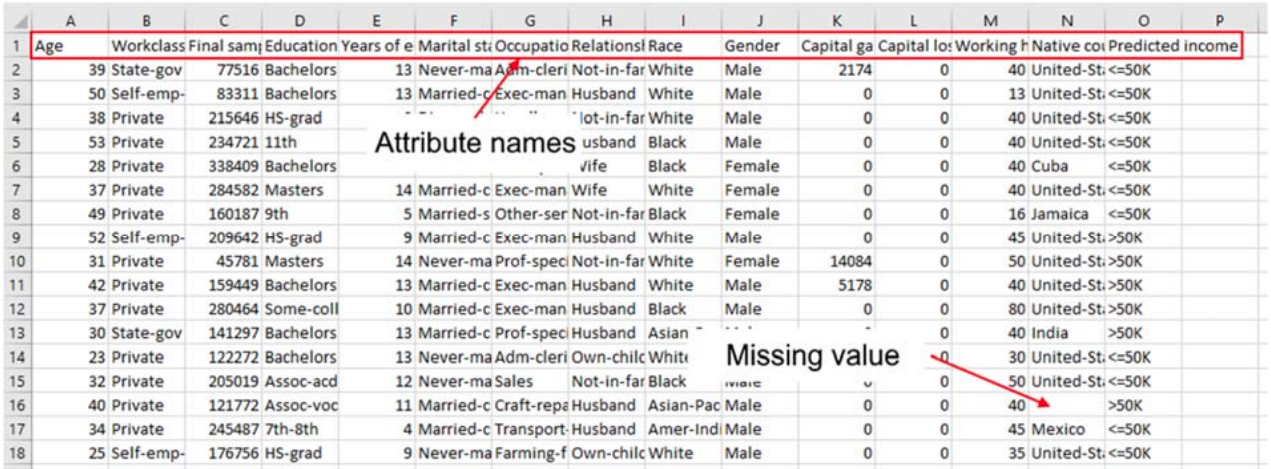

Figure 1. The data file US_census.csv opened in Excel
* Now, read the CSV data into a dataframe object using Pandas.
* Refer to tutorial 3 if you do not remember how this can be done.
* Check the dimensions of the dataframe created.
* The outcome should be (500, 15), suggesting that it consists of 500 rows (excluding the
header) and 15 columns. So there are 500 tuples (samples) and each tuple consists of 15
attributes.

## Task 1: Data cleaning
Some tuples consist of missing values (denoted by “NaN” [Not-a-Number] in the dataframe object,
and this NaN is actually the Numpy constant numpy.nan) for certain attributes such as workclass,
occupation and native country, and working hours. These tuples are handled as follows:

1. Delete the tuple if its attribute value in either workclass or occupation is missing.
2. For the missing values in native country, fill with the major one (i.e. the country that appear
most in the dataset)
3. For the missing values in working hours per week, fill with the average value (rounded to
nearest integer) of this attribute.

Write a Python script to perform the above manipulation. No hurry to export the processed data,
your script can be extended to include tasks 2 and 3 as well.

The hints below provide some clues for writing the script for the above three operations.

Hints:
1. pandas.isna(x) determines whether each value in a series object x consists of missing value.
Meanwhile, pandas.notna(x) performs the opposite. Try them to see how they work.
2. Moreover, for two series objects containing boolean values with identical index, an OR
(AND) operations and be performed using an elementwise operator “|” (“&”). Try the
example below:

In [2]:
s1 = pd.Series([True, True, False, False])
s2 = pd.Series([False, True, False, True])
print(s1 | s2)

NameError: name 'pd' is not defined

3. Apart from the basic retrieval methods discussed in tutorial 3, there is another way that
allows certain rows to be extracted. Consider the following example:

In [ ]:
d = pd.DataFrame([['California', 'Sacramento', 39536653],
                  ['Utah', 'Salt Lake City', 3101833],
                  ['Texas', 'Austin', 28304596],
                  ['Florida', 'Tallahassee', 20984400],
                  ['Minnesota', 'Saint Paul', 5576606]],
                  columns=['State', 'Capital', 'Population'])
s = pd.Series([True, False, True, False, False])

print(d[s])

It is important to note that d and s must have identical index (0 – 4). The first and the third
items in d are extracted by d[s] because s[0] and s[2] are True.

4. For (i), refer to tutorial 3 to see how the dataframe rows can be deleted.

5. For (ii), since each column of a dataframe object is a series object (refer to tutorial 3), we
can use the series object function value_counts() to count the number of time each country
appears. The function output is also a series object, in which the index (i.e. countries) is in
the descending order (by default) of the count. Determine how to obtain the major country
from the output.

6. For (iii), Pandas provides a series object function mean() to calculate the average value for
a row or a column. According to the documentation its syntax is:
> Series.mean(axis=0, skipna=True, level=None, numeric_only=None)

    While the last two input parameters can be ignored here, the
default value for the input
parameter axis is 0, which indicates the mean is calculated along index (refer to tutorial 3
for index in series objects). skipna is a boolean value controlling whether to skip the null
(i.e. empty) values in the series object. Its default value is True.

7. Besides iterating the column to replace the missing values, a series object function where()
can perform value replacement at once. Refer to https://pandas.pydata.org/pandasdocs/stable/generated/pandas.Series.where.html# to see how this function works.

In [6]:
import pandas as pd
import numpy as np

# TODO: Load the dataset from CSV
df = pd.read_csv('/content/US_census.csv')

# i: Delete the tuple if its attribute value in either Workclass or Occupation is missing.
# TODO: Find which rows have missing values in "Workclass" or "Occupation"
missingWorkclass = df['Workclass'].isna()
missingOccupation = df['Occupation'].isna()

# TODO: Combine the conditions and get the indices
missingIndices = missingWorkclass | missingOccupation

# TODO: Drop those rows from the DataFrame
df = df.drop(df[missingIndices].index)


# ii: For the missing values in native country, fill with the major one
# TODO: Find the most frequent country (mode)
mostPopularCountry = df['Native country'].value_counts().index[0]

# TODO: Find rows with missing country info
missingCountries = df['Native country'].isna()

# TODO: Replace them with the most popular country
df['Native country'] = df['Native country'].where(df['Native country'].notna(), mostPopularCountry)


# iii: For the missing values in working hours per week, fill with the average value
# TODO: Calculate the mean and round it
meanWorkingHours = round(df['Working hours per week'].mean())

# TODO: Find missing entries
missingWorkingHours = df['Working hours per week'].isna()

# TODO: Replace them with the mean
df['Working hours per week'] = df['Working hours per week'].where(df['Working hours per week'].notna(), meanWorkingHours)

## Task 2: Data reduction
Sometimes not all attributes will be used for the subsequent data mining tasks. For computational
efficiency reason those unused attributes will be removed. In this task the only following attributes
are retained: age, workclass, education, marital status, occupation, relationship, race, gender,
working hours per week, native country, and predicted income. Remove those not listed above.
Refer to tutorial 3 for the deletion of row/column in a dataframe.

In [7]:
'''Task 2: Keep Only Important Attributes'''

# TODO: View all column names first if needed
# print(df.columns)

# Specify unwanted columns to remove
unwanted_columns = ['Final sampling weight', 'Education', 'Years of education', 'Capital gain', 'Capital loss']

# TODO: Drop the unwanted columns from the DataFrame
df = df.drop(columns=unwanted_columns)

## Task 3: Data transformation (Encoding)
The two attributes predicted income and age will be transformed as follows:
i. Predicted income: Assign the value “1” to those with this attribute value being “<=50K”,
assign “2” to those with this attribute value being “>50K”.
ii. Age: Add an attribute called “Age group” using the following ranges:

    Age group
    < 20
    20 – 29
    30 – 39
    40 – 49
    50 – 59
    >= 60

Suppose the age attribute value of a tuple is 37, then the age group attribute should be
assigned with “30-39”.

After the completing all the three tasks, export the pre-processed data to another CSV file.
(refer to tutorial 3 for exporting dataframe object to CSV file)

Hints:
The following pseudocode illustrates this transformation process:

    Create a new series object age_group for the age group attribute
    For each value (i.e. row) in the data column “age”:
        If age attribute value < 20:
            Assign “<20” to the age_group
        Else if age attribute value between 20 and 29:
            Assign “20-29” to the age_group
        Else if age attribute value between 30 and 39:
            Assign “30-39” to the age_group
        Else if age attribute value between 40 and 49:
            Assign “40-49” to the age_group
        Else if age attribute value between 50 and 59:
            Assign “50-59” to the age_group
        Else if age attribute value >= 60:
            Assign “>=60” to the age_group
    Add age_group to the dataframe object

In [9]:
'''Task 3: Data Transformation'''
# -------------------------------
# Subtask (i): Transform income labels to numeric values
# -------------------------------
def transformIncome(income):
    if income == '<=50K':
        return 1
    elif income == '>50K':
        return 2
    else:
        return None # Handle potential unexpected values

# TODO: Apply income transformation to "Predicted income" column
df['Predicted income'] = df['Predicted income'].apply(transformIncome)

# -------------------------------
# Subtask (ii): Group ages into buckets
# -------------------------------
def transformAgeToGroup(age):
    if age < 20:
        return '< 20'
    elif 20 <= age <= 29:
        return '20 – 29'
    elif 30 <= age <= 39:
        return '30 – 39'
    elif 40 <= age <= 49:
        return '40 – 49'
    elif 50 <= age <= 59:
        return '50 – 59'
    elif age >= 60:
        return '>= 60'
    else:
        return None # Handle potential unexpected values

# TODO: Apply age group transformation to "Age" column
df['Age group'] = df['Age'].apply(transformAgeToGroup)

# Save the preprocessed file.
df.to_csv('US_census_preprocessed.csv', index=False)

Dataset Reference:
Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository http://archive.ics.uci.edu/ml].
Irvine, CA: University of California, School of Information and Computer Science.

In [18]:
print(df.columns)
print(df['Age group'])

Index(['Age', 'Workclass', 'Marital status', 'Occupation', 'Relationship',
       'Race', 'Gender', 'Working hours per week', 'Native country',
       'Predicted income', 'Age group'],
      dtype='object')
0      30 – 39
1      50 – 59
2      30 – 39
3      50 – 59
4      20 – 29
        ...   
494    30 – 39
495    40 – 49
496    20 – 29
497    20 – 29
498    20 – 29
Name: Age group, Length: 469, dtype: object
